2020-1-11 19:57:40
刚刚读完《强化学习（第二版）》第三章：有限马尔科夫决策过程，印象深刻的有：
- 贝尔曼方程。

### 贝尔曼方程是什么

$$\begin{aligned} 
v_\pi (s) = & \mathbb{E}_\pi [G_t | S_t = s] \\
= & \mathbb{E}_{\pi} [R_{t+1} + \gamma G_{t+1} | S_t = s] \\
= & \sum_a \pi(a|s) \sum_{s'} \sum_{r} p(s', r| s,a) \left[ r + \gamma \mathbb{E}_\pi [G_{t+1} | S_{t+1} = s'] \right] \\
= &\sum_a \pi(a|s) \sum_{s',r} p(s',r|s,a)[r + \gamma v_\pi (s')] \quad for \; all \; s \in S
\end{aligned}$$

各符号意义：
- 上图中，$v_\pi(s)$表示在状态s下的，使用策略集$\pi$的价值；
- $G_t$就是在当前时刻$t$所产生的“回报”，在有限时刻中，通常引入折扣率$\gamma$的概念，将$G_t$定义为$G_t = R_{t+1} + \gamma G_{t+1}$，表示下一步对当前决策影响最大，时间越远，影响越小；
- $\pi(a|s)$是策略，在我看来就是在状态$s$下选择动作$a$的概率；
- $p()$是状态转移概率，$r$是回报。

对这个方程我还有个通俗的解释，请见[https://blog.csdn.net/weixin_42815609/article/details/103934891](https://blog.csdn.net/weixin_42815609/article/details/103934891)。

### 贝尔曼方程用处

其实只在理论上有用（目前在我看来）。

#### 贝尔曼方程组

$$
\begin{aligned}
& v(s_1) = f(v(s_1), v(s_2), ..., v(s_n)) \\
& v(s_2) = f(v(s_1), v(s_2), ..., v(s_n)) \\
& ... \\
& v(s_n) = f(v(s_1), v(s_2), ..., v(s_n)) \\
\end{aligned}
$$

可见，这构造了一个关于$v(s_i)$的n元1次方程组，可以求解每个状态的价值。

当然，这里$v_\pi (s)$简写成了$v(s)$，我们知道每个状态的价值是由策略决定的，策略糟糕，价值低。

#### 贝尔曼最优方程

最优方程说明：最优策略下各个状态的价值一定等于这个状态下最优动作的期望回报。

假设只有2个状态（$s_1$与$s_2$），对于状态$s_1$，其最优价值：

$$v_* (s_1) = =\max \left\{ \begin{aligned}
& p(s_1 | s_1, a_1) [r(s_1, a_1, s_1) + \gamma v_* (s_1)] + 
p(s_2 | s_1, a_1) [r(s_2, a_1, s_1) + \gamma v_* (s_2)] \\
& p(s_1 | s_1, a_2) [r(s_1, a_2, s_1) + \gamma v_* (s_1)] + 
p(s_2 | s_1, a_2) [r(s_2, a_2, s_1) + \gamma v_* (s_2)] \\
& ... \\
& p(s_1 | s_1, a_n) [r(s_1, a_n, s_1) + \gamma v_* (s_1)] + 
p(s_2 | s_1, a_n) [r(s_2, a_n, s_1) + \gamma v_* (s_2)] \\
\end{aligned} \right\}$$

如上，是需要选择出一个/多个最优动作的。

如果将两个状态的方程式联立，则计算量急剧增大。

**而对于状态多的更不用说，几乎不可计算。因此，要使用近似算。**

### 复现一下网格问题

#### 问题描述

![](images/03_grid_world.jpg)

#### 注意下面的分析也很有趣

#### 复现

参考[https://github.com/ShangtongZhang/reinforcement-learning-an-introduction](https://github.com/ShangtongZhang/reinforcement-learning-an-introduction)。

复现了策略={上下左右概率一样}与策略={最优}时。

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table
%matplotlib inline

WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9

# left, up, right, down
# 用坐标表示动作，比如向左ACTIONS[0]，即y+0，x-1
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
ACTION_PROB = 0.25

In [32]:
def step(state, action):
    if state == A_POS:
        return A_PRIME_POS, 10
    if state == B_POS:
        return B_PRIME_POS, 5

    next_state = (np.array(state) + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

In [33]:
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(image):
        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor='white')

    # Row and column labels...
    # 行号、列号
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')

    ax.add_table(tb)

In [34]:
def figure_3_2():
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keep iteration until convergence
        # 直到迭代不动了，停止（收敛到解了）
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                for action in ACTIONS:
                    # 上下左右都进行一遍（因为现在的策略是等概率选择上下左右的）
                    (next_i, next_j), reward = step([i, j], action)
                    # bellman equation
                    new_value[i, j] += ACTION_PROB * (reward + DISCOUNT * value[next_i, next_j])
        if np.sum(np.abs(value - new_value)) < 1e-4:
            draw_image(np.round(new_value, decimals=2))
            plt.show()
            break
        value = new_value

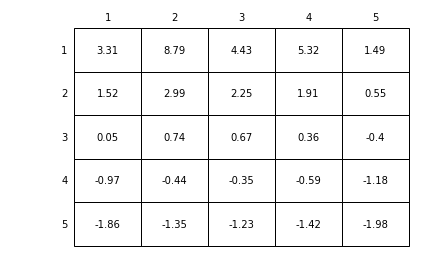

In [35]:
figure_3_2()

In [36]:
def figure_3_5():
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keep iteration until convergence
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                values = []
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    # value iteration
                    values.append(reward + DISCOUNT * value[next_i, next_j])
                # 这里，没有保留每个状态的最优动作是什么，让我做个改进
                new_value[i, j] = np.max(values)
        if np.sum(np.abs(new_value - value)) < 1e-4:
            draw_image(np.round(new_value, decimals=2))
            plt.show()
            break
        value = new_value

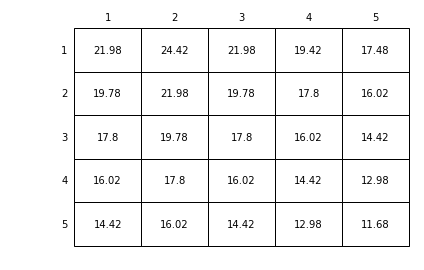

In [37]:
figure_3_5()

In [48]:
def figure_3_5_prove():
    # PiperLiu@qq.com
    # 2020-1-11 20:48:40
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keep iteration until convergence
        new_value = np.zeros_like(value)
        action_optimal = dict()
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                values = []
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    # value iteration
                    values.append(reward + DISCOUNT * value[next_i, next_j])
                # 这里，没有保留每个状态的最优动作是什么，让我做个改进
                new_value[i, j] = np.max(values)
                action_optimal.setdefault((i, j), np.where(new_value[i, j] == values))
        if np.sum(np.abs(new_value - value)) < 1e-4:
            draw_image_prove(action_optimal)
            plt.show()
            break
        value = new_value

def number2char(number):
    if number == 0:
        return 'left,'
    elif number == 1:
        return 'up,'
    elif number == 2:
        return 'right,'
    return 'down,'

def number2str(number):
    str = ''
    for num in number[0]:
        str = str + number2char(num)
    return str

def draw_image_prove(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = 0, 0
    for key in image:
        if key[0] > nrows:
            nrows = key[0]
        if key[1] > ncols:
            ncols = key[1]
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for key in image:
        tb.add_cell(key[0], key[1], width, height, text=number2str(image[key]),
                    loc='center', facecolor='white')

    # Row and column labels...
    for i in range(nrows):  # 这里默认为正方形了，可以向原仓库提供一个pull request
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')

    ax.add_table(tb)

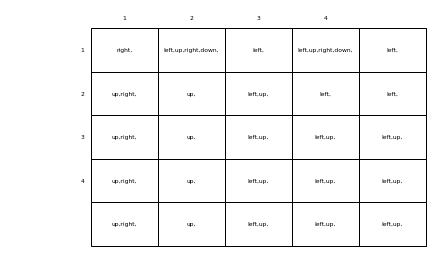

In [49]:
figure_3_5_prove()

**如上，我写的代码，所产出的最优动作结果与书上结果一致。**

2020-1-11 21:33:57